### Where Art Thou Min'ral?
In this notebook, we'll be using [H2o's AutoMl](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html) algorithm to train our first **Binary Classification Model** on the data we prepared in our earlier notebook. 

Before we begin, make sure you install h2o in your system. You can refer to the instalation page [here](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html#install-in-python).

You can also train your own models on the prepared data using State-Of-The-Art Algorithms such as 
- Tensorflow & Keras
- Sklearn
- Pytorch
- MLBox
- AutoKeras & Hyperas
- AutoSkLearn etc.

In [2]:
# Importing the required library - h2o - for data importing & modelling.
import h2o
from h2o.automl import H2OAutoML

# Initializing a local server to train our model upon. Make sure you adjust the Mem_Size as per your system.
# You can always look it up in the documentation to learn more!
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_252"; OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1ubuntu1-b09); OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
  Starting server from /home/xavian/anaconda3/envs/gawler/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqpl6fpzo
  JVM stdout: /tmp/tmpqpl6fpzo/h2o_xavian_started_from_python.out
  JVM stderr: /tmp/tmpqpl6fpzo/h2o_xavian_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_xavian_71mked
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.457 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [9]:
# Importing the file into an H2o dataframe.
df = h2o.import_file('/home/xavian/Downloads/The_Gawler_Challenge/final_files/Model1/merged/Model1_Merged.csv')

# We need to split the data into train and test. Change the ratio as per your preference.
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
train.head()

C1,LONGITUDE_,LATITUDE_G,MINERAL_CL,gravity_ma,dem-9s,SA_TMI,gravity_1V,SA_TMI_VRT,d8-9s
142,129.11,-31.5842,N,-33.482,95.7766,-36.3184,-0.00034,-192.407,2
143,129.346,-31.5211,N,-25.5448,96.9994,-143.02,0.00044,-423.11,2
145,129.385,-31.6402,N,-28.2794,87.0945,1077.01,-0.00015,667.035,1
147,129.167,-31.1688,Y,-32.5929,129.967,-1565.33,0.00068,-1701.49,4
148,129.164,-31.1625,Y,-33.3853,131.218,-227.706,0.00042,640.236,4
149,129.11,-30.7499,N,-45.8616,154.939,172.563,-0.00022,43.9881,1
150,129.247,-30.5269,N,-52.8326,159.276,64.9359,-0.00034,52.2999,2
151,129.371,-30.5701,N,-53.8595,138.374,206.621,-0.00018,327.643,2
153,129.376,-26.6621,N,-4.67423,538.87,360.422,0.00034,68.9003,16
154,129.404,-26.6963,N,-6.10203,536.082,-157.93,0.0017,292.317,64


### Specifying x & y
Now that we have the data loaded, we need to specify `x` & `y` (in other words - training features & lables). A cool feature about H2o's AutoML is that we only need to specify the column names for x & y along with an H2o dataframe (the one that we loaded above) for training.

This saves us a lot of time in converting a dataframe to an array and then reshaping it to fit our model structure. So without any further ado let's proceed with the training!

![](https://media.giphy.com/media/5fBH6zhaIxvlPxmKDT2/giphy.gif)



In [4]:
# Specifying the name of the y column
y = "MINERAL_CL" 
x = train.columns 
x

['C1',
 'LONGITUDE_',
 'LATITUDE_G',
 'MINERAL_CL',
 'gravity_ma',
 'dem-9s',
 'SA_TMI',
 'gravity_1V',
 'SA_TMI_VRT',
 'd8-9s']

In [5]:
# Remove the columns we need to drop from our training frame.
r_rows = ['C1',
 'LONGITUDE_',
 'LATITUDE_G',
 'MINERAL_CL']

for i in range(len(r_rows)):
    # print(r_rows[i])
    x.remove(r_rows[i])

In [20]:
aml = H2OAutoML(max_runtime_secs=60*20, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [7]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200727_124044,0.974477,0.206775,0.96855,0.0794594,0.244633,0.0598451
StackedEnsemble_BestOfFamily_AutoML_20200727_124044,0.974477,0.206775,0.96855,0.0794594,0.244633,0.0598451
XRT_1_AutoML_20200727_124044,0.968238,0.310829,0.957845,0.0865591,0.257452,0.0662815
DRF_1_AutoML_20200727_124044,0.967498,0.341058,0.956753,0.0861919,0.257144,0.0661233
XGBoost_2_AutoML_20200727_124044,0.952623,0.322326,0.941681,0.114306,0.30492,0.0929761
GBM_5_AutoML_20200727_124044,0.940133,0.448496,0.923522,0.129502,0.369517,0.136543
XGBoost_grid__1_AutoML_20200727_124044_model_1,0.937109,0.321957,0.922166,0.135476,0.314705,0.0990389
XGBoost_1_AutoML_20200727_124044,0.935977,0.36538,0.921319,0.136669,0.328868,0.108154
GBM_4_AutoML_20200727_124044,0.933944,0.421054,0.919515,0.138774,0.355434,0.126333
GBM_3_AutoML_20200727_124044,0.912445,0.454956,0.890158,0.165261,0.375382,0.140912


In [29]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200727_130454,0.977349,0.195728,0.972297,0.0753031,0.237675,0.0564893
StackedEnsemble_BestOfFamily_AutoML_20200727_130454,0.977349,0.195728,0.972297,0.0753031,0.237675,0.0564893
DRF_1_AutoML_20200727_130454,0.976129,0.216466,0.970375,0.0769354,0.243678,0.0593789
XRT_1_AutoML_20200727_130454,0.972935,0.243863,0.965447,0.0804539,0.249788,0.0623942
XGBoost_2_AutoML_20200727_130454,0.961389,0.263156,0.952788,0.101885,0.277815,0.0771813
GBM_5_AutoML_20200727_130454,0.949435,0.351741,0.938337,0.120675,0.318762,0.101609
XGBoost_1_AutoML_20200727_130454,0.947571,0.300069,0.935833,0.12216,0.300862,0.0905181
XGBoost_grid__1_AutoML_20200727_130454_model_1,0.944831,0.30148,0.931614,0.124733,0.303365,0.0920301
GBM_4_AutoML_20200727_130454,0.942094,0.349772,0.929859,0.128643,0.32109,0.103099
GBM_grid__1_AutoML_20200727_130454_model_2,0.92922,0.35629,0.914609,0.146284,0.329473,0.108552


In [22]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [31]:
h2o.save_model(aml.leader, path="./saved_model")

'/home/xavian/Downloads/The_Gawler_Challenge/exported/combined/saved_model/StackedEnsemble_AllModels_AutoML_20200727_130454'

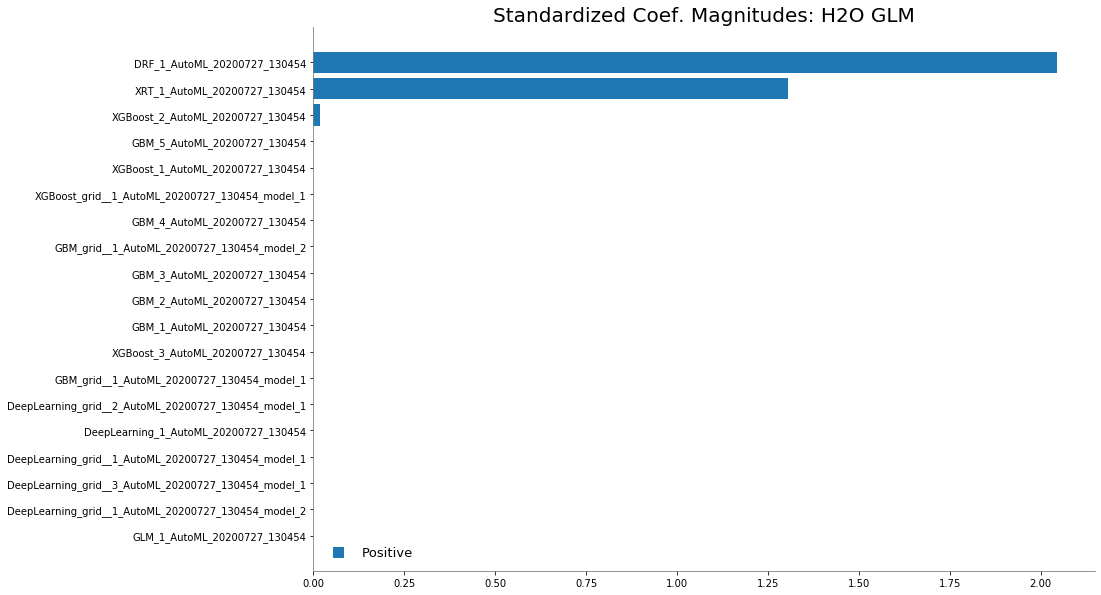

In [23]:
import matplotlib
%matplotlib inline
metalearner.std_coef_plot()

In [16]:
y_pred = aml.predict(train)
y_pred = y_pred['predict'].as_data_frame().values.reshape(len(y_pred))

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [17]:
y_true=train['MINERAL_CL'].as_data_frame().values
y_true = y_true.reshape(len(y_true))

In [18]:
y_pred[0] == y_true[0]

True

In [19]:
a = 0
for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
        a+=1
        

print(a/len(y_true))

0.9652314834749727


In [117]:
pred['predict'].as_data_frame().values

array([['yes'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [ ]:
model_path = h2o.save_model(model=aml, path="/saved_model_20_min", force=True)

In [155]:
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,dem-9s,119779.539062,1.000000,0.408038
1,SA_RAD_DOS,52932.183594,0.441913,0.180317
2,gravity_ma,39166.226562,0.326986,0.133423
3,SA_TMI_VRT,31434.869141,0.262439,0.107085
4,SA_TMI,24329.259766,0.203117,0.082879
5,gravity_1V,18932.708984,0.158063,0.064496
6,d8-9s,6975.341797,0.058235,0.023762
